### Exploratory Data Analysis - Retail
### Author: Haseeb Ahmad
### Function: Data Science and Business Analytics
### Task 3: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In this task we will perform 'Exploratory Data Analysis' on dataset 'SampleSuperStore'. As a business manager, we will try to find out the weak areas where we can work to make more profit. Also, what all business problems can be derived by exploring the data.

### Importing libraries

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing the SampleSuperStore dataset into DataFrame

In [53]:
sample = pd.read_csv('SampleSuperStore.csv')
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [54]:
sample.shape # Number of elements in each dimension of the dataset

(9994, 13)

### Checking the concise summary of our data

In [55]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [56]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking for missing values

In [57]:
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Checking for duplicate data

In [58]:
sample.duplicated().sum()

17

In [59]:
sample.drop_duplicates() # dropped the duplicate rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [60]:
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Dropping the irrelevant columns

In [61]:
sample.drop(['Postal Code'],axis=1,inplace=True)

In [62]:
sample.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Checking the statistical relation between various rows and columns

Covariance is when two variables vary with each other, whereas Correlation is when the change in one variable results in the change in another variable.

In [64]:
sample.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [65]:
sample.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


### Data Visualization

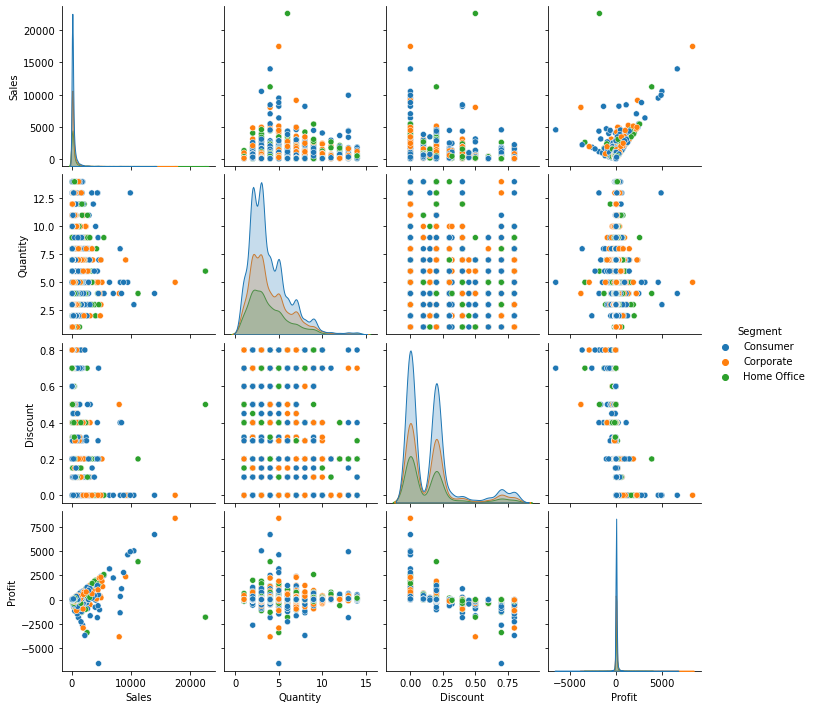

In [66]:
sns.pairplot(sample, hue='Segment')

<AxesSubplot:>

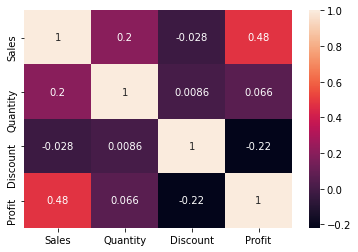

In [26]:
# heat map showing the correlation between the features
sns.heatmap(sample.corr(), annot = True)

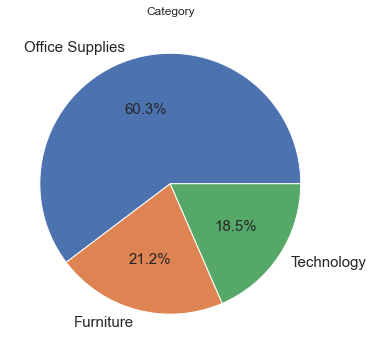

In [118]:
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(sample['Category'].value_counts(), labels=sample['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

Office supplies have highest demand.

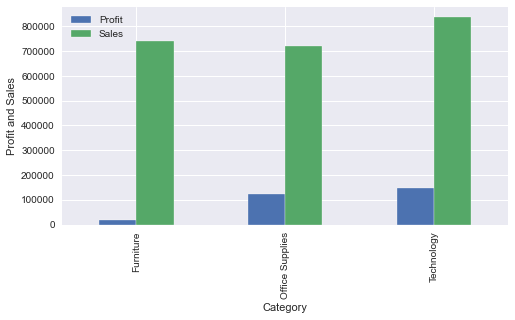

In [173]:
sample.groupby('Category')['Profit','Sales'].agg(sum).plot(kind='bar',figsize=(8,4))
plt.ylabel('Profit and Sales')
plt.show()

Furniture is generating very less profit.

Text(0.5, 1.0, 'Count of Segment by Category and Segment')

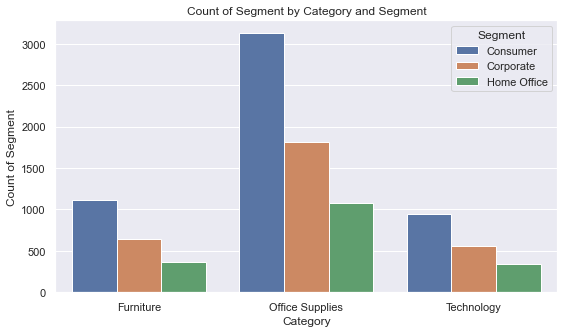

In [128]:
plt.figure(figsize=(9,5))
sns.countplot(x='Category',hue='Segment',data=sample)
plt.ylabel('Count of Segment')
plt.title('Count of Segment by Category and Segment')

The highest purchases are in consumer segment whereas home office segment has the least purchases in each category. We need to focus on the corporate and home office segment as well to increase our sales and profit.

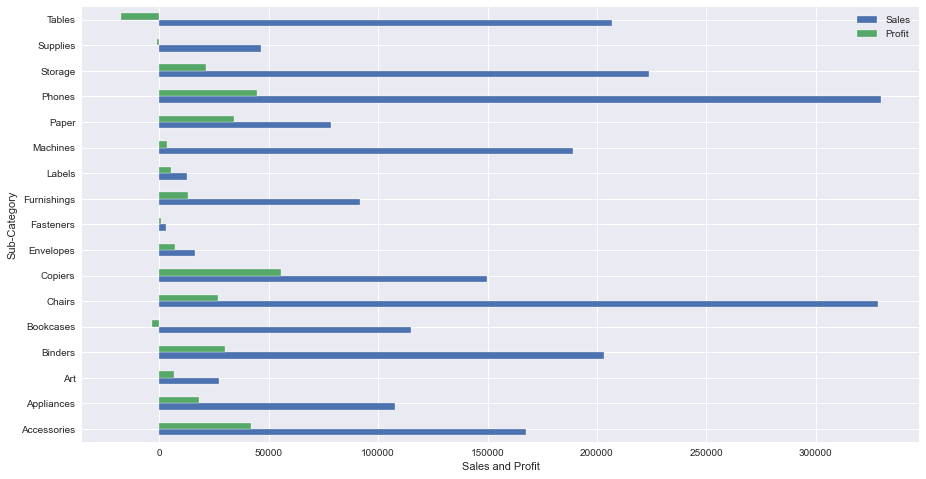

In [171]:
sample.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='barh',figsize=(15, 8))
plt.ylabel('Sub-Category')
plt.xlabel('Sales and Profit')
plt.show()

We have 3 weak areas Bookcases, Supplies and Tables as we are facing loss on the sales of these items. On the sales of tables we are facing highest loss.

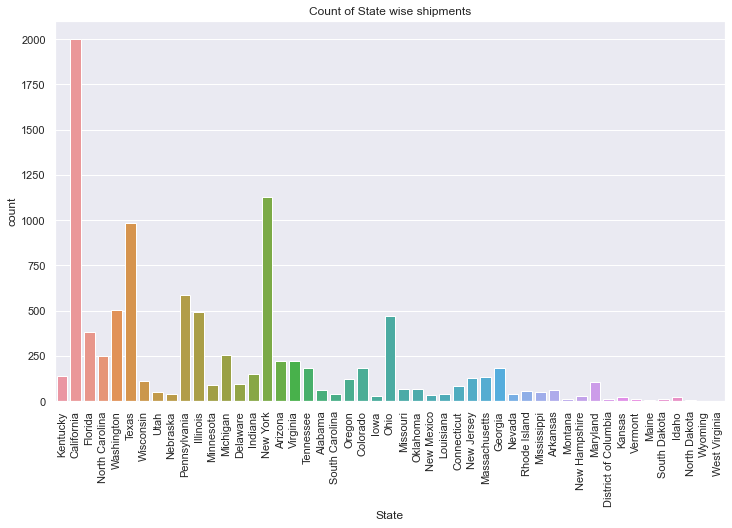

In [89]:
plt.figure(figsize=(12,7))
sns.countplot(x=sample['State'])
plt.xticks(rotation=90)
plt.title('Count of State wise shipments')

plt.show()

State wise California has highest sales. Few states like North Dakota, Wyoming and West Virginia have less or no sales at all. To generate more profit we have to increase our sales in Texas and New York where we have potential customers.

Text(0.5, 1.0, 'Count of ship mode by region and ship mode')

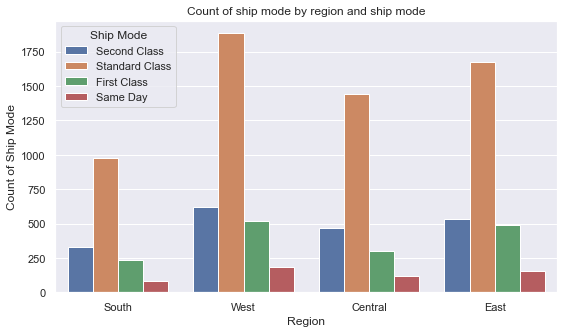

In [130]:
plt.figure(figsize=(9,5))
sns.countplot(x='Region',hue='Ship Mode',data=sample)
plt.ylabel('Count of Ship Mode')
plt.title('Count of ship mode by region and ship mode')

Least sales are in Southern region, we can attract this region by offering more discount. Standard mode of shipment is opted by most of the customers in each region.

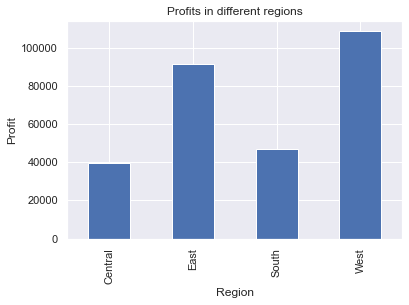

In [143]:
sample.groupby('Region')['Profit'].agg(sum).plot(kind='bar')
plt.ylabel('Profit')
plt.title('Profits in different regions')
plt.show()

Central and Southern region are generating less profit as compared to the Eastern and Western Region. Increase the sales in Central and Southern region in order to generate more profit in these region.

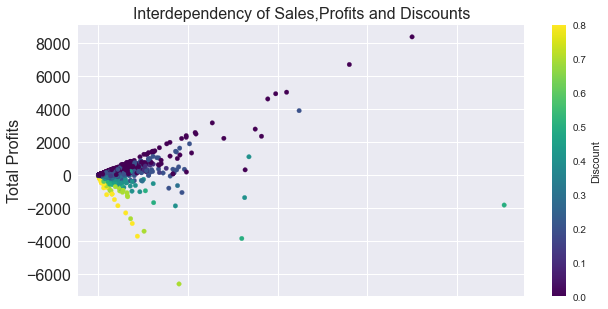

In [148]:
sample.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

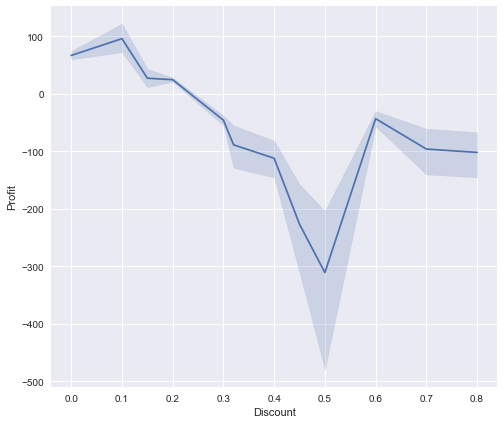

In [168]:
plt.figure(figsize=(8,7))
sns.lineplot(sample['Discount'], sample['Profit'], data=sample)

To keep the profit margins the percentage of discount should be less than 25%.

### Conclusion
The weak areas where one can work to make more profit are:

1. We should limit the sales of furniture and increase that of office supplies and technology as furtinute is generating very less profit as compared to its sales.
2. In the sub-gategories we are facing huge loss on the sale of tables so its sale should be minimized.
3. The sales and profit in Southern and Central region are less so we should give more incentives like discount in these states in order to increase sales, hence profit will increase.
4. After the highest sales in California we have high value of potenial customers in Texas and New York so we should concentrate more on these states to generate more profit.
5. We have highest purchases in consumer segment but we should also concentrate on corporate and home office segments to increase our sales and profit. 
6.Few states like North Dakota, Wyoming and West Virginia have less or no sales at all so we also need to focus on these state.
7. The percentage of discount offered should not be more than 25%, otherwise we will face loss.